<a href="https://colab.research.google.com/github/Mads8760/Ciencia-de-dados/blob/main/Normaliza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Aplicação prática Geral** -  Aplicando Normalização de Dados em um Problema de Previsão de Rendimento Escolar.
Neste exercício, você aplicará técnicas de normalização de dados em um dataset sintético que simula informações relacionadas ao rendimento escolar de alunos. O objetivo é preparar os dados para aplicação em algoritmos de Machine Learning e analisar como a normalização afeta a visualização e o comportamento dos dados

**Cenário:**
Você é um cientista de dados encarregado de ajudar uma escola a prever o rendimento escolar de seus alunos com base em informações como tempo de estudo, número de faltas e nível de participação em atividades extracurriculares. O dataset contém valores em escalas diferentes, o que pode impactar negativamente os resultados de alguns algoritmos de aprendizado de máquina.

Seu trabalho é normalizar esses dados para que fiquem em uma escala comparável.

Tarefas:

1. Pré-processar os Dados:

  Preencha os valores ausentes (utilize a média ou mediana).
  Visualize os dados antes da normalização usando gráficos de dispersão e histogramas.

2. Aplicar Técnicas de Normalização:

  Min-Max Scaling: Normalize os dados para uma faixa entre 0 e 1.
  Standard Scaling: Padronize os dados para uma distribuição com média 0 e desvio padrão 1.
  Normalização Logarítmica: Aplique logaritmo em uma característica com valores muito dispersos.
  Use a técnica Whiten (normalização de matriz de covariância esférica) em uma cópia do dataset.

3. Analisar os Efeitos da Normalização:

  Compare os dados antes e depois da normalização usando gráficos.

**Geração do Dataset Proposto**

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, make_classification, make_blobs
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer)
from sklearn.impute import SimpleImputer
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando semente para reprodutibilidade
np.random.seed(42)

# Gerando dataset com 3 características (tempo de estudo, número de faltas e participação)
X, y = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0,
                           n_classes=2, random_state=42)

# Convertendo X para DataFrame e adicionando a coluna alvo
df = pd.DataFrame(X, columns=['StudyTime', 'Absences', 'Participation'])
df['Performance'] = y  # Coluna alvo: rendimento escolar (0 = baixo, 1 = alto)

# Ajustando escalas para simular diferentes unidades
df['StudyTime'] = df['StudyTime'] * 10 + 50  # Tempo de estudo (em horas/semana)
df['Absences'] = df['Absences'] * 5 + 20     # Número de faltas
df['Participation'] = df['Participation'] * 100 + 500  # Nível de participação

# Introduzindo valores ausentes (NaN) aleatoriamente
nan_indices = np.random.choice(df.index, size=15, replace=False)
df.loc[nan_indices, 'StudyTime'] = np.nan

nan_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[nan_indices, 'Absences'] = np.nan

nan_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[nan_indices, 'Participation'] = np.nan

# Visualizando as primeiras linhas do dataset com valores ausentes
print("Dataset Sintético com Diferentes Escalas e Valores Ausentes:")
df.head()


Dataset Sintético com Diferentes Escalas e Valores Ausentes:


,StudyTime,Absences,Participation,Performance
0,52.242567,24.998171,585.249256,1
1,51.743773,27.311377,691.281149,1
2,54.434188,25.401373,447.921652,1
3,51.260363,23.742440,490.653427,1
4,52.626757,24.809743,508.245432,1


**Remoção de Linhas com NaN**

In [3]:
# Remoção de linhas com valores ausentes
df  = df.dropna()
df


,StudyTime,Absences,Participation,Performance
0,52.242567,24.998171,585.249256,1
1,51.743773,27.311377,691.281149,1
2,54.434188,25.401373,447.921652,1
3,51.260363,23.742440,490.653427,1
4,52.626757,24.809743,508.245432,1
...,...,...,...,...
195,49.610718,19.140977,396.390391,1
196,49.963620,16.097142,505.854365,0
197,36.316124,13.303961,313.302468,0
198,70.191957,28.188717,320.488374,1


**Preenchimento com Média (SimpleImputer)**

In [20]:
# Preenchendo os valores ausentes com a média das colunas
imputer = SimpleImputer(strategy='mean')
result_imputer = imputer.fit_transform(df)
df_imputed = pd.DataFrame(result_imputer, columns=df.columns)
print("Tamanho do dataset: ", df.shape)
df.head()

Tamanho do dataset:  (170, 4)


,StudyTime,Absences,Participation,Performance
0,52.242567,24.998171,585.249256,1.0
1,51.743773,27.311377,691.281149,1.0
2,54.434188,25.401373,447.921652,1.0
3,51.260363,23.742440,490.653427,1.0
4,52.626757,24.809743,508.245432,1.0


**Normalização dos Dados**

Min-Max Scaling


In [7]:
df_minmax= MinMaxScaler()
normalized_data = df_minmax.fit_transform(df)
normalized_data = pd.DataFrame(normalized_data, columns=["Studytime", "Absences", "Participation", "Performance"])
normalized_data.head()

,Studytime,Absences,Participation,Performance
0,0.513455,0.585975,0.634191,1.0
1,0.505535,0.660805,0.793164,1.0
2,0.548257,0.599018,0.428297,1.0
3,0.497858,0.545354,0.492365,1.0
4,0.519556,0.579880,0.518740,1.0


**Standard Scaling**

In [8]:
df_standard = StandardScaler()
standardized_data = df_standard.fit_transform(df)
standardized_data = pd.DataFrame(standardized_data, columns=["Studytime", "Absences", "Participation","Perfomance"])
standardized_data.head()

,Studytime,Absences,Participation,Perfomance
0,-0.194825,0.773336,0.919370,0.988304
1,-0.231854,1.104835,1.758039,0.988304
2,-0.032128,0.831117,-0.166835,0.988304
3,-0.267740,0.593380,0.171155,0.988304
4,-0.166304,0.746332,0.310301,0.988304


**Normalização Logarítmica**

In [10]:
df_log =np.log(df)
df_log.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,StudyTime,Absences,Participation,Performance
0,3.955898,3.218803,6.372038,0.0
1,3.946304,3.307303,6.538547,0.0
2,3.996992,3.234803,6.104618,0.0
3,3.936918,3.167264,6.195738,0.0
4,3.963225,3.211236,6.230964,0.0


**Normalização com Whiten**

In [13]:
df_whiten = whiten(df)
df_whiten = pd.DataFrame(df_whiten, columns=["Studytime", "Absences", "Participation","Perfomance"])
df_whiten.head()

,Studytime,Absences,Participation,Perfomance
0,3.878284,3.582426,4.629082,2.000138
1,3.841255,3.913925,5.467751,2.000138
2,4.040981,3.640207,3.542877,2.000138
3,3.805369,3.402470,3.880868,2.000138
4,3.906804,3.555423,4.020013,2.000138


**Visualização dos Dados**

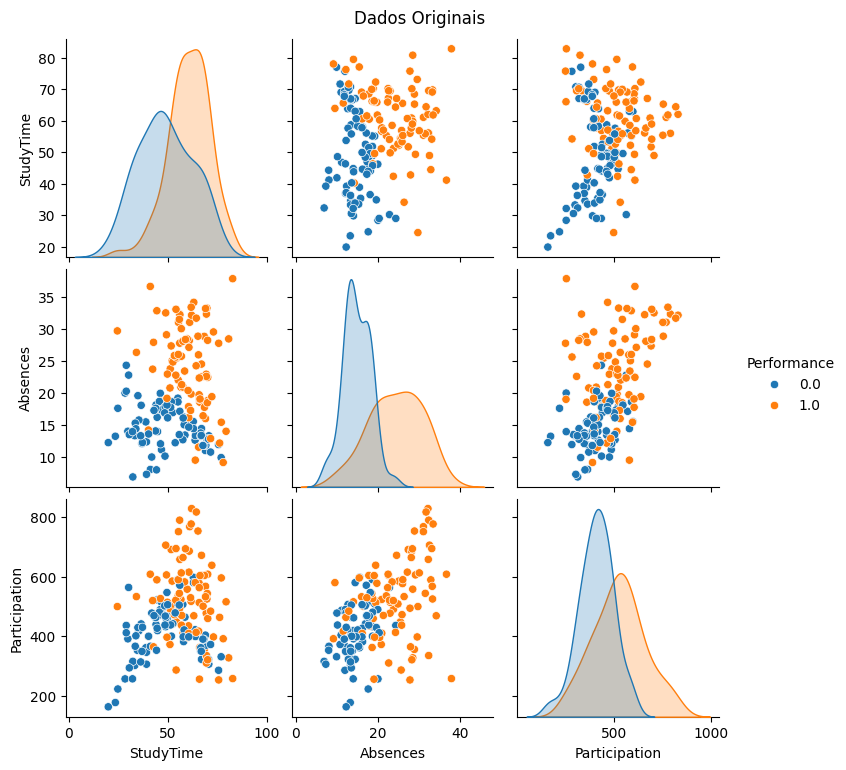

In [21]:
sns.pairplot(df_imputed, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Originais", y=1.02)
plt.show()


**Após Min-Max Scaling**

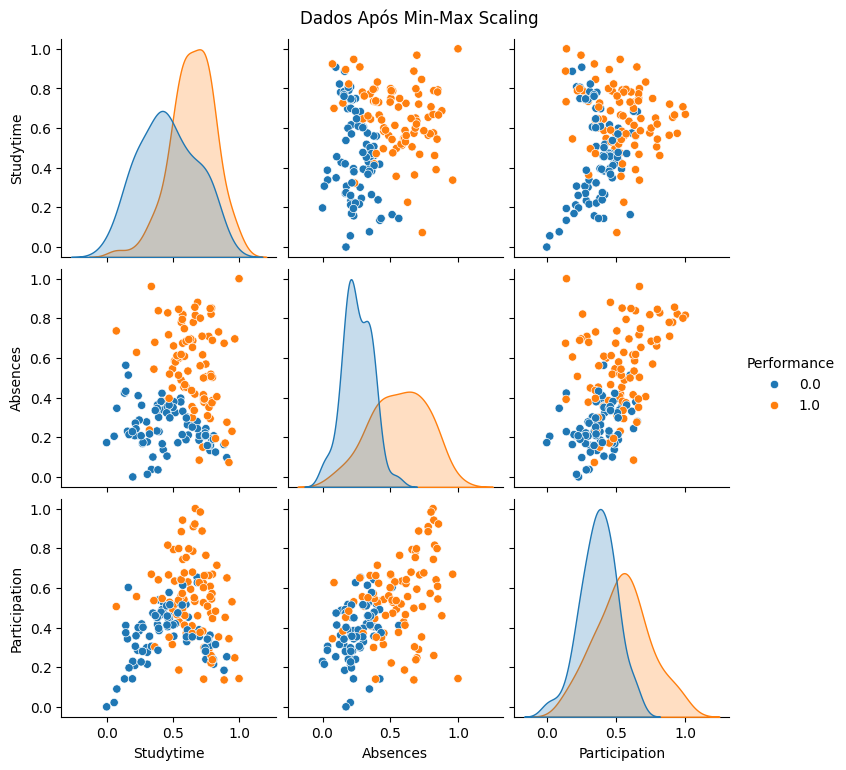

In [19]:
sns.pairplot(normalized_data, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Após Min-Max Scaling", y=1.02)
plt.show()

**Após Standard Scaling**

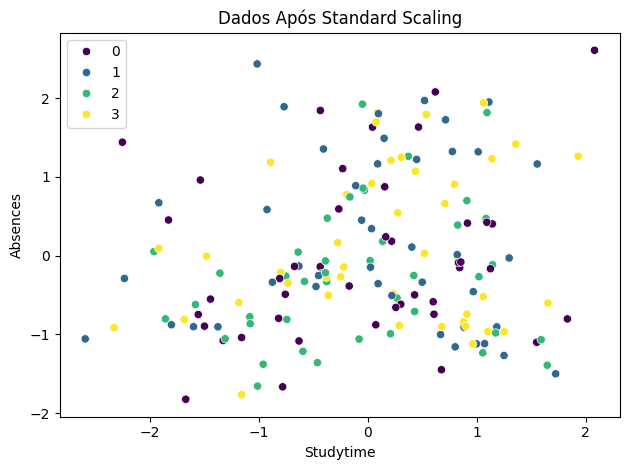

In [49]:
data, labels = make_blobs(n_samples=170, centers=4, random_state=42)
sns.scatterplot(x=standardized_data["Studytime"], y=standardized_data["Absences"], hue=labels, palette="viridis")

plt.title("Dados Após Standard Scaling")
sns.scatterplot()
plt.tight_layout()
plt.show()

**Após Normalização Logarítmica**

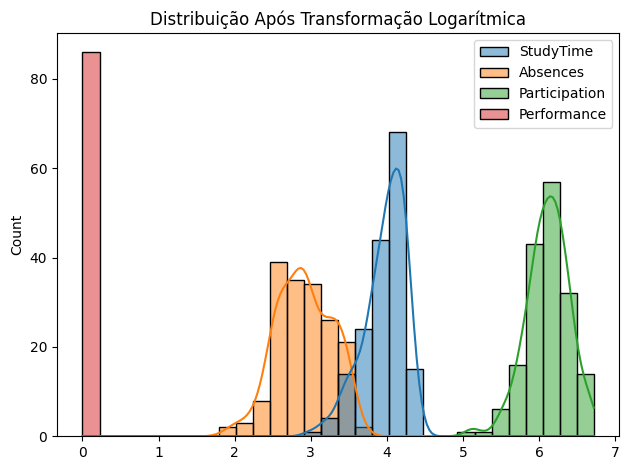

In [35]:
sns.histplot(df_log, bins=30, kde=True)
plt.title("Distribuição Após Transformação Logarítmica")
plt.tight_layout()
plt.show()



**Após Whiten**

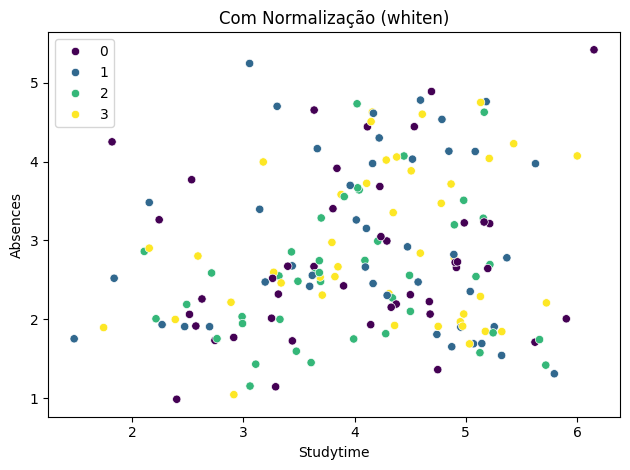

In [43]:
data, labels = make_blobs(n_samples=170, centers=4, random_state=42)

sns.scatterplot(x=df_whiten["Studytime"], y=df_whiten["Absences"], hue=labels, palette="viridis")
plt.title("Com Normalização (whiten)")
plt.tight_layout()
plt.show()
